# Wealth transfer

This is a tutorial for beginners on how to create a simple agent-based model with the [agentpy](https://agentpy.readthedocs.io) package. 
It shows the how to create a basic model with a custom agent type, run a simulation, record data, and visualize results.

## About the model

The model explores the distribution of wealth under a trading population of agents. 
We will see that their random interaction will create an inequality of wealth that 
follows a [Boltzmann distribution](http://www.phys.ufl.edu/~meisel/Boltzmann.pdf).
The original version of this model been written in [MESA](https://mesa.readthedocs.io/) 
and can be found [here](https://mesa.readthedocs.io/en/master/tutorials/intro_tutorial.html).

## Getting started

To install the latest version of agentpy, run the following command:

In [ ]:
!pip install agentpy

Once installed, the recommended way to import the package is as follows:

In [1]:
import agentpy as ap

We also import two other libraries that will be used in this demonstration.

In [2]:
import numpy as np  # Scientific computing tools
import matplotlib.pyplot as plt  # Visualization

## Model definition

In [3]:
class WealthAgent(ap.Agent):

    """ An agent with wealth """

    def setup(self):

        self.wealth = 1

    def wealth_transfer(self):

        if self.wealth > 0:

            partner = self.model.agents.random()
            partner.wealth += 1
            self.wealth -= 1

In [4]:
def gini(x):

    """ Calculate Gini Coefficient """
    # By Warren Weckesser https://stackoverflow.com/a/39513799

    mad = np.abs(np.subtract.outer(x, x)).mean()  # Mean absolute difference
    rmad = mad / np.mean(x)  # Relative mean absolute difference
    return 0.5 * rmad 

In [5]:
class WealthModel(ap.Model):

    """ A simple model of random wealth transfers """

    def setup(self):

        self.add_agents(self.p.agents, WealthAgent)

    def step(self):

        self.agents.wealth_transfer()

    def update(self):

        self.record('Gini Coefficient', gini(self.agents.wealth))

    def end(self):

        self.agents.record('wealth')

## Running a simulation

In [6]:
parameters = {
    'agents': 100,
    'steps': 100
}

In [7]:
model = WealthModel(parameters)
results = model.run()

Completed: 100 steps
Run time: 0:00:00.282838
Simulation finished


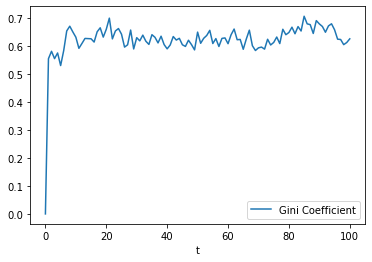

In [8]:
data = results.variables.model
ax = data.plot()

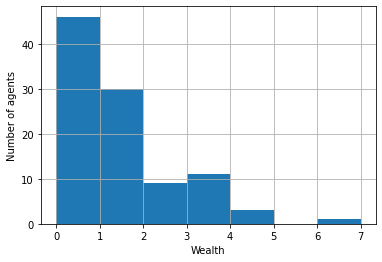

In [9]:
data = results.variables.WealthAgent
data.hist(bins=range(data.wealth.max()+1))

plt.title('')
plt.xlabel('Wealth')
plt.ylabel('Number of agents')
plt.show()

What we get is a Boltzmann distribution. For those interested to understand this result, you can read more about it [here](http://www.phys.ufl.edu/~meisel/Boltzmann.pdf).